# Project P4 report



In [2]:
#import libraries to use dataframes
import pandas as pd
import numpy as np

#we use sklearn for the logistic regression learning algorithm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc


#import the data
DATA_FOLDER = 'data/'
DATASET = DATA_FOLDER+"SambnisImp.csv"

#Opening and loading of files
df = pd.read_csv(DATASET, error_bad_lines=False, warn_bad_lines=True)

In [3]:
x_fearon = df[["warhist", "ln_gdpen", "lpopns", "lmtnest",
    "ncontig", "oil", "nwstate", "inst3", "pol4", "ef", "relfrac"]]

x_collier = df[["sxpnew", "sxpsq", "ln_gdpen", "gdpgrowth",
    "warhist", "lmtnest", "ef", "popdense", "lpopns", "coldwar", "seceduc",
    "ptime"]]

x_hegre = df[["lpopns", "ln_gdpen", "inst3", "parreg", "geo34",
    "proxregc", "gdpgrowth", "anoc", "partfree", "nat_war", "lmtnest",
    "decade1", "pol4sq", "nwstate", "regd4_alt", "etdo4590", "milper", "geo1",
    "tnatwar", "presi"]]

y = df["warstds"]

Feature ranking:
1. feature 7 (0.220000)
2. feature 18 (0.188807)
3. feature 11 (0.146925)
4. feature 4 (0.075462)
5. feature 5 (0.053614)
6. feature 15 (0.052413)
7. feature 13 (0.051078)
8. feature 0 (0.046428)
9. feature 2 (0.046222)
10. feature 1 (0.037903)
11. feature 14 (0.028764)
12. feature 17 (0.026028)
13. feature 16 (0.013242)
14. feature 8 (0.004909)
15. feature 6 (0.004743)
16. feature 10 (0.003064)
17. feature 9 (0.000397)
18. feature 12 (0.000000)
19. feature 3 (0.000000)


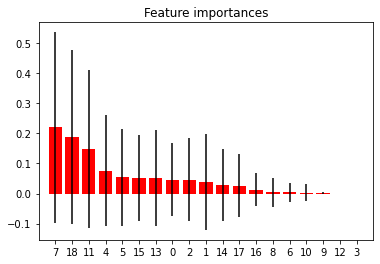

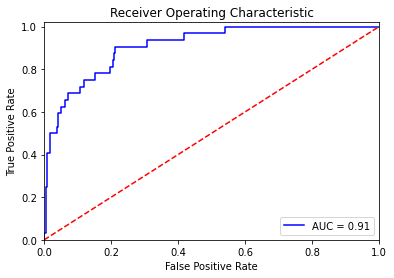

In [38]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

X_rf = df[["gdpgrowth","nmgdp","life","geo1", "infant", "trade", "lmtnest", "illiteracy", "dlang", "anocracy", "regd4_alt"
           , "sxpsq", "dem", "milper", "popdense", "inst3", "ef", "seceduc", "sxpnew"]]


X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

gini = clf.feature_importances_ #(normalize=False)


std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(gini)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], gini[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), gini[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()




# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

